In [2]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [3]:
# PULL IN S&P500 DATA FROM CSVall
snp_path = Path("SnP500_data.csv")
snp_data = pd.read_csv(snp_path, index_col="Dates", infer_datetime_format=True, parse_dates=True)
snp_data = snp_data.sort_index()
snp_data.tail()

,S&P 500 (^SPX) - Index Value
Dates,
2020-05-01,2830.71
2020-05-04,2842.74
2020-05-05,2868.44
2020-05-06,2848.42
2020-05-07,2881.19


In [4]:
# Count nulls and cleanse data
snp_data.isnull().sum()

S&P 500 (^SPX) - Index Value    0
dtype: int64

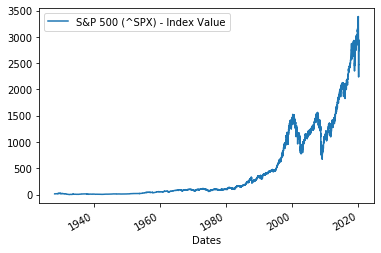

In [5]:
#Plot Line Graph
snp_data.plot(kind="line")

In [6]:
#Plot Line Graph
snp_2020 = snp_data.loc['2020-01-01':'2020-05-07']
snp_2020.head()


,S&P 500 (^SPX) - Index Value
Dates,
2020-01-02,3257.85
2020-01-03,3234.85
2020-01-06,3246.28
2020-01-07,3237.18
2020-01-08,3253.05


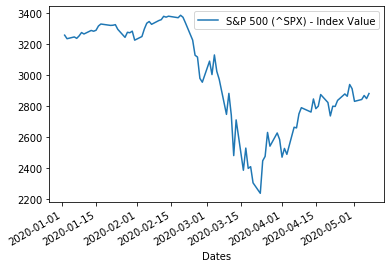

In [7]:
snp_2020.plot(kind="line")

In [8]:
snp_2020.shape

(88, 1)

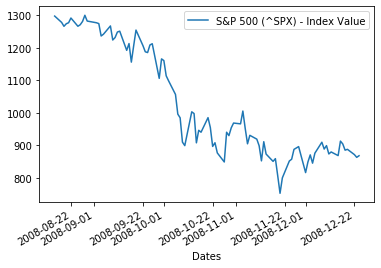

In [9]:
snp_08crash = snp_data.loc['2008-08-15':'2008-12-24']
snp_08crash.plot(kind="line")

In [10]:
snp_08crash_df = snp_08crash.reset_index()
snp_2020_df = snp_2020.reset_index()

In [11]:
# concat the two dataframes
master_df = pd.concat([snp_08crash_df,snp_2020_df], join="inner", axis="columns")
master_df.head()

,Dates,S&P 500 (^SPX) - Index Value,Dates,S&P 500 (^SPX) - Index Value
0,2008-08-15,1298.20,2020-01-02,3257.85
1,2008-08-18,1278.60,2020-01-03,3234.85
2,2008-08-19,1266.69,2020-01-06,3246.28
3,2008-08-20,1274.54,2020-01-07,3237.18
4,2008-08-21,1277.72,2020-01-08,3253.05


In [12]:
df_clean = master_df.drop(columns=["Dates"])

In [13]:
# determine daily change percentage pct_change
df_pct_change = df_clean.pct_change()
df_pct_change.dropna()
# Calculate the correlation between each column
correlation = df_pct_change.corr()
correlation

,S&P 500 (^SPX) - Index Value,S&P 500 (^SPX) - Index Value
S&P 500 (^SPX) - Index Value,1.000000,0.132549
S&P 500 (^SPX) - Index Value,0.132549,1.000000


In [14]:
# Use the `heatmap` function from the Seaborn library to visualize correlations
#sns.heatmap(correlation, vmin=-1, vmax=1)

# Use the `heatmap` function from the Seaborn library to visualize correlations
#sns.heatmap(correlation, vmin=-1, vmax=1)